# Exploratory Data Analysis

In [1]:
# Interacting with the data
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('mako_r')
palette = sns.color_palette()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('../Data/Insurance Claims Data - Cleaned.xlsx')

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Data Preprocessing

As our aim is to predict incident severity, we will start by dropping features that are not relevant to the incident.

In [5]:
# Drop irrelevant features
df = df.drop(['months_as_customer','age','policy_bind_date','policy_state','policy_csl',
              'policy_deductable','policy_annual_premium','umbrella_limit', 'insured_zip',
              'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
              'insured_relationship','capital-gains', 'capital-loss','witnesses','fraud_reported'
             ],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   policy_number                1000 non-null   int64         
 1   incident_date                1000 non-null   datetime64[ns]
 2   incident_type                1000 non-null   object        
 3   collision_type               1000 non-null   object        
 4   incident_severity            1000 non-null   object        
 5   authorities_contacted        909 non-null    object        
 6   incident_state               1000 non-null   object        
 7   incident_city                1000 non-null   object        
 8   incident_location            1000 non-null   object        
 9   incident_hour_of_the_day     1000 non-null   int64         
 10  number_of_vehicles_involved  1000 non-null   int64         
 11  property_damage              1000 non-null  

The remaining dataset is comprised of the following feature types:
- Numeric: 9
- Object: 11
- Datetime: 1

In [7]:
# Missing values
df.isna().any()

policy_number                  False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
police_report_available        False
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
auto_make                      False
auto_model                     False
auto_year                      False
dtype: bool

The majority of data preprocessing was performed in Microsoft Excel prior to loading the dataset. However, the following must still be addressed:
- Remove redundant features: the feature `policy_number` is a unique customer identifier and provides no additional information relating to the claim.
- Normalizing the case of text data to avoid discrepancies.
- Address missing values: despite imputing data into missing values during data cleaning, the 'None' category in the feature `authorities_contacted` is being identified as a NaN value.
- The features `collision_type`, `property_damage` and `police_report` contain '?' where the category is not known.

In [8]:
# Remove policy_number feature
df = df.drop('policy_number', axis=1)

In [9]:
# Normalize case of text columns to avoid inconsistencies
def lowercase_strings(x):
    if isinstance(x, str):
        return x.lower()
    else:
        return x

df = df.applymap(lowercase_strings)

In [10]:
# Replace NaN values with the string 'none'
df['authorities_contacted'] = df['authorities_contacted'].fillna('none')

In [11]:
# Replace '?' datapoints with 'unknown'
df = df.replace('?', 'unknown')

In [12]:
df.head()

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,2015-01-25,single vehicle collision,side collision,major damage,police,sc,columbus,9935 4th drive,5,1,yes,1,yes,71610,6510,13020,52080,saab,92x,2004
1,2015-01-21,vehicle theft,unknown,minor damage,police,va,riverwood,6608 mlk hwy,8,1,unknown,0,unknown,5070,780,780,3510,mercedes,e400,2007
2,2015-02-22,multi-vehicle collision,rear collision,minor damage,police,ny,columbus,7121 francis lane,7,3,no,2,no,34650,7700,3850,23100,dodge,ram,2007
3,2015-01-10,single vehicle collision,front collision,major damage,police,oh,arlington,6956 maple drive,5,1,unknown,1,no,63400,6340,6340,50720,chevrolet,tahoe,2014
4,2015-02-17,vehicle theft,unknown,minor damage,none,ny,arlington,3041 3rd ave,20,1,no,0,no,6500,1300,650,4550,accura,rsx,2009


In [13]:
df['incident_severity'].value_counts()

incident_severity
minor damage      354
total loss        280
major damage      276
trivial damage     90
Name: count, dtype: int64

## Exploratory Data Analysis

### Summary Statistics

In [14]:
df.drop('incident_date', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
incident_hour_of_the_day,1000.0,11.644,6.951373,0.0,6.0,12.0,17.0,23.0
number_of_vehicles_involved,1000.0,1.839,1.018880,1.0,1.0,1.0,3.0,4.0
bodily_injuries,1000.0,0.992,0.820127,0.0,0.0,1.0,2.0,2.0
total_claim_amount,1000.0,52761.940,26401.533190,100.0,41812.5,58055.0,70592.5,114920.0
injury_claim,1000.0,7433.420,4880.951853,0.0,4295.0,6775.0,11305.0,21450.0
property_claim,1000.0,7399.570,4824.726179,0.0,4445.0,6750.0,10885.0,23670.0
vehicle_claim,1000.0,37928.950,18886.252893,70.0,30292.5,42100.0,50822.5,79560.0
auto_year,1000.0,2005.103,6.015861,1995.0,2000.0,2005.0,2010.0,2015.0


### Incident Severity

In [15]:
# Counts of incident severity
df['incident_severity'].value_counts()

incident_severity
minor damage      354
total loss        280
major damage      276
trivial damage     90
Name: count, dtype: int64

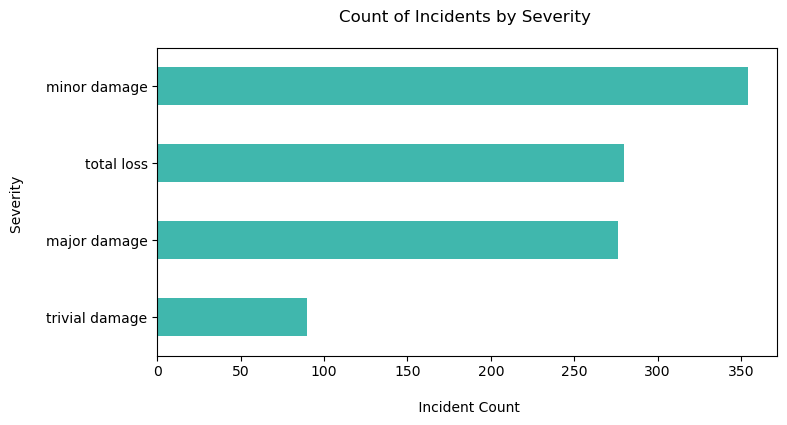

In [16]:
severity_counts = df['incident_severity'].value_counts().sort_values(ascending=True)

severity_counts.plot(kind='barh', figsize=(8,4), color=palette[1])
plt.title('Count of Incidents by Severity \n')
plt.xlabel('\n Incident Count')
plt.ylabel('Severity \n')
plt.show()

Minor damage accounts for the majority of claims, with trivial damage being the minority. Based on the fact that this dataset is fairly small, containing only 1000 observations, it will be difficult to build a model that can accurately predict all four classes. We will therefore combine the minor and trivial damage classes into a single class called `minor`, and major damage and total loss into a single class called `major`.

In [17]:
# Change the incident severity to a binary label
df['incident_severity'] = df['incident_severity'].apply(lambda x: 'major' if x in ['major damage','total loss'] else 'minor')

In [18]:
# Create separate DataFrames for each class
minor = df[df['incident_severity'] == 'minor']
major = df[df['incident_severity'] == 'major']

### Datetime Analysis

In [19]:
# Day of week
# Day of the year?
# Months
# Weeks
# Time of day

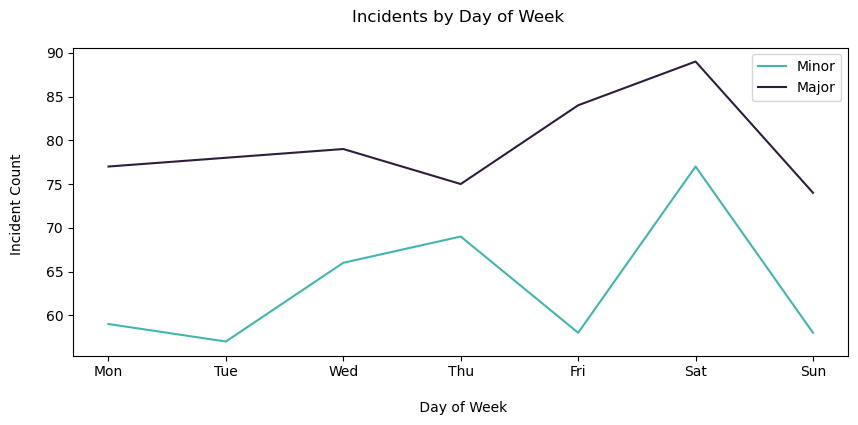

In [20]:
# Incidents by day of the week
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
minor_weekday_counts = minor['incident_date'].dt.weekday.value_counts().sort_index()
major_weekday_counts = major['incident_date'].dt.weekday.value_counts().sort_index()

plt.figure(figsize=(10,4))

minor_weekday_counts.plot(label='Minor', color=palette[1])
major_weekday_counts.plot(label='Major', color=palette[5])

plt.title('Incidents by Day of Week \n')
plt.xlabel('\n Day of Week')
plt.ylabel('Incident Count \n')
plt.xticks(range(0,len(weekdays)),weekdays)
plt.legend(loc='upper right')
plt.show()

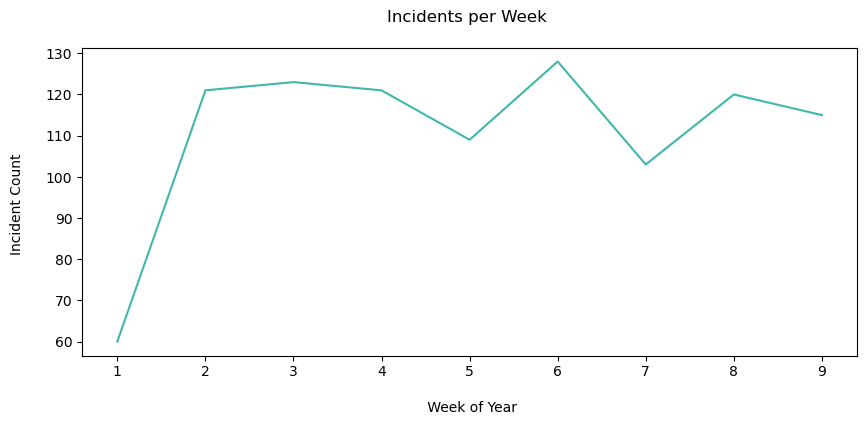

In [21]:
# Incidents by week of the year
week_of_year_counts = df['incident_date'].dt.isocalendar().week.value_counts().sort_index()

plt.figure(figsize=(10,4))
week_of_year_counts.plot(color=palette[1])
plt.title('Incidents per Week \n')
plt.xlabel('\n Week of Year')
plt.ylabel('Incident Count \n')
plt.show()

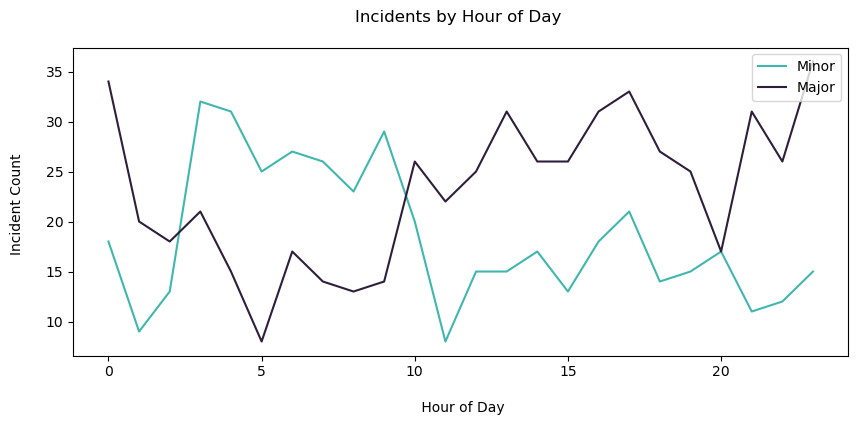

In [22]:
# Incidents by hour of the day
minor_hour_counts = minor['incident_hour_of_the_day'].value_counts().sort_index()
major_hour_counts = major['incident_hour_of_the_day'].value_counts().sort_index()

plt.figure(figsize=(10,4))

minor_hour_counts.plot(label='Minor', color=palette[1])
major_hour_counts.plot(label='Major', color=palette[5])

plt.title('Incidents by Hour of Day \n')
plt.xlabel('\n Hour of Day')
plt.ylabel('Incident Count \n')
plt.legend(loc='upper right')
plt.show()

Possibly can create a feature capturing hour of the day better, like maybe morning/afternoon/evening. Also weekend (Fri/Sat) or not.

### Comparison of Incident Features

#### Authorities Contacted

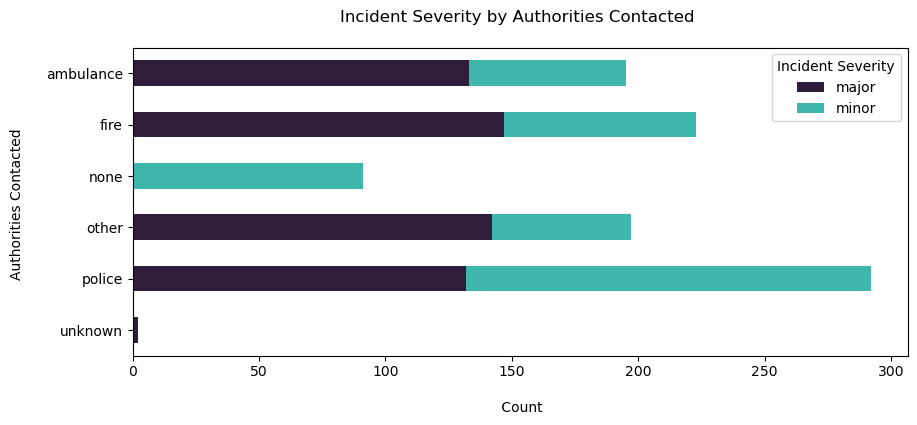

In [23]:
# Group by 'authorities_contacted' and 'incident_severity', then count occurrences
authority_counts = df.groupby(['authorities_contacted', 'incident_severity']).size().unstack()
authority_counts = authority_counts.sort_index(ascending=False)

authority_counts.plot(kind='barh', stacked=True, figsize=(10, 4), color=[palette[5],palette[1]])
plt.title('Incident Severity by Authorities Contacted \n')
plt.xlabel('\n Count')
plt.ylabel('Authorities Contacted \n')
plt.legend(title='Incident Severity', loc='upper right')
plt.show()

- Only minor incidents did not contact authorities at all.
- Ambulance, fire and other were more often contacted in major incidents than minor.
- Minor incidents most often contacted police.

In [24]:
# Location as in highway/street/avenue etc

#### Property damage

In [25]:
# Overall property damage
df['property_damage'].value_counts()

property_damage
unknown    360
no         338
yes        302
Name: count, dtype: int64

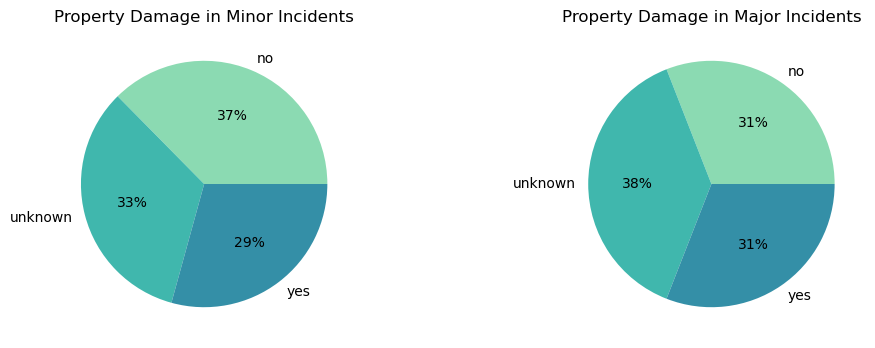

In [26]:
# Property damage by incident severity
minor_property_damage = minor.groupby('property_damage').size()
major_property_damage = major.groupby('property_damage').size()

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].pie(minor_property_damage, labels=minor_property_damage.index, autopct='%1.0f%%')
ax[0].set_title('Property Damage in Minor Incidents')

ax[1].pie(major_property_damage, labels=major_property_damage.index, autopct='%1.0f%%')
ax[1].set_title('Property Damage in Major Incidents')

plt.show()

- Minor incidents had a higher proportion with no property damage.
- Major incidents show a higher propertion of unknown property damage.
- Major and minor incidents show similar proportions of having property damage.

#### Bodily Injuries

In [27]:
# Overall bodily injuries
df.groupby('bodily_injuries').size()

bodily_injuries
0    340
1    328
2    332
dtype: int64

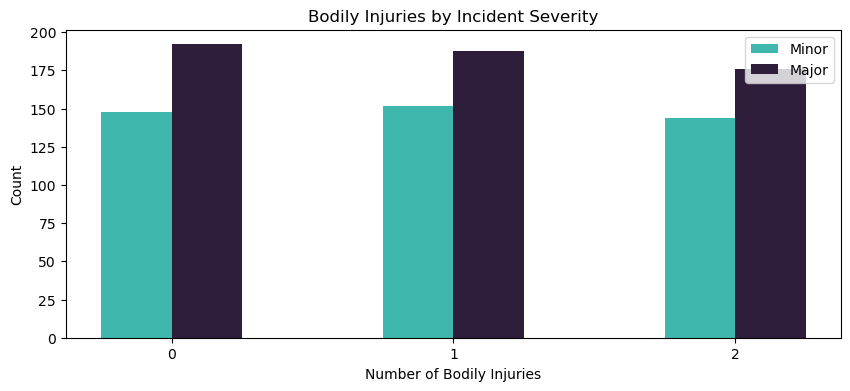

In [28]:
bodily_injuries = [0,1,2]
minor_bodily_injuries = [148,152,144]
major_bodily_injuries = [192,188,176]

x = np.arange(len(bodily_injuries))
width = 0.25

fig, ax = plt.subplots(figsize=(10,4))

bars_minor = ax.bar(x - width/2, minor_bodily_injuries, width, label='Minor', color=palette[1])
bars_major = ax.bar(x + width/2, major_bodily_injuries, width, label='Major', color=palette[5])

ax.set_title('Bodily Injuries by Incident Severity')
ax.set_xlabel('Number of Bodily Injuries')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(bodily_injuries)
ax.legend(loc='upper right')
plt.show()

#### Type of collision

In [29]:
# Overall collision types
df.groupby('collision_type').size()

collision_type
front collision    254
rear collision     292
side collision     276
unknown            178
dtype: int64

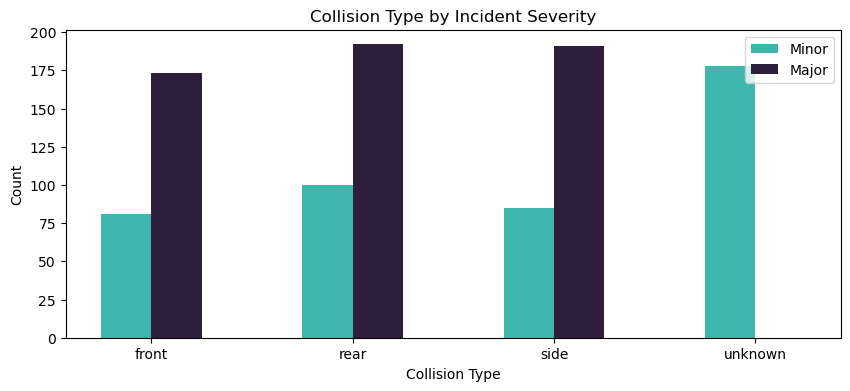

In [30]:
collision_types = ['front','rear','side','unknown']
minor_collision_types = [81,100,85,178]
major_collision_types = [173,192,191,0]

x = np.arange(len(collision_types))
width = 0.25

fig, ax = plt.subplots(figsize=(10,4))

bars_minor = ax.bar(x - width/2, minor_collision_types, width, label='Minor', color=palette[1])
bars_major = ax.bar(x + width/2, major_collision_types, width, label='Major', color=palette[5])

ax.set_title('Collision Type by Incident Severity')
ax.set_xlabel('Collision Type')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(collision_types)
ax.legend(loc='upper right')
plt.show()

#### Incident Type

In [31]:
# Overall incident types
df.groupby('incident_type').size()

incident_type
multi-vehicle collision     419
parked car                   84
single vehicle collision    403
vehicle theft                94
dtype: int64

In [32]:
df[df['collision_type'] == 'unknown']['incident_type'].value_counts()

incident_type
vehicle theft    94
parked car       84
Name: count, dtype: int64

- All vehicle thefts and incidents involving a parked car are classified as minor incidents, making up 40% of all minor incidents.
- These two incident types also constitute the entirety of the 'unknown' collision type category.

Now we'll take a look at the distribution of the remaining incident types, 'multi-vehicle' and 'single_vehicle' collisions.

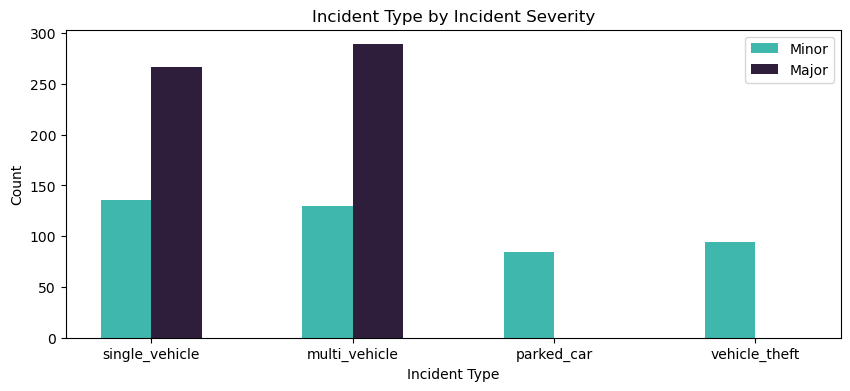

In [33]:
incident_types = ['single_vehicle','multi_vehicle','parked_car','vehicle_theft']
minor_incident_types = [136,130,84,94]
major_incident_types = [267,289,0,0]

x = np.arange(len(incident_types))
width = 0.25

fig, ax = plt.subplots(figsize=(10,4))

bars_minor = ax.bar(x - width/2, minor_incident_types, width, label='Minor', color=palette[1])
bars_major = ax.bar(x + width/2, major_incident_types, width, label='Major', color=palette[5])

ax.set_title('Incident Type by Incident Severity')
ax.set_xlabel('Incident Type')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(incident_types)
ax.legend(loc='upper right')
plt.show()

### Vehicle Details

#### Vehicle Brand

In [34]:
pd.DataFrame(df.groupby(['auto_make','incident_severity'])['incident_severity'].count())

incident_severity
auto_make  incident_severity                   
accura     major                             34
           minor                             34
audi       major                             46
           minor                             23
bmw        major                             35
           minor                             37
chevrolet  major                             40
           minor                             36
dodge      major                             47
           minor                             33
ford       major                             43
           minor                             29
honda      major                             28
           minor                             27
jeep       major                             33
           minor                             34
mercedes   major                             47
           minor                             18
nissan     major                             38
           minor                             40
saab       major                             50
           minor                             30
suburu     major                             47
           minor                             33
toyota     major                             33
           minor                             37
volkswagen major                             35
           minor                             33

There do appear to be certain vehicle brands that have signficant discrepancies in the ratio between minor and major incidents.
- Claims for Dodge, Ford, Saab and Suburu vehicles have at least 40% more major than minor incidents.
- Audi has double the number of major claims compared to minor, whilst Mercedes has 2.6 times more.
- The remainder of the vehicle brands have similar counts of minor and major incidents.

#### Vehicle Age

In [35]:
df.groupby('auto_year').count().index

Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype='int64', name='auto_year')

The vehicles in the dataset have year models spread over 21 years, from 1995 to 2015. We'll group these into fewer bins to try and identify any relationship between vehicle age and incident severity.

In [36]:
def vehicle_age(df):
    
    '''
    Classifies vehicles into age bins based on the manufacturing year.
    
    Parameters
    ----------
    df: DataFrame
        A pandas DataFrame containing a column named 'auto_year' representing the year
        of vehicle manufacture.
    
    Returns
    -------
    str:
        A string indicating the age bin to which the vehicle belongs:
            - '0 to 5'    : Vehicles manufactured within the last 5 years (up to 5 years old).
            - '5 to 10'   : Vehicles manufactured between 6 to 10 years ago (6 to 10 years old).
            - '10 to 15'  : Vehicles manufactured between 11 to 15 years ago (11 to 15 years old).
            - 'over 15'   : Vehicles manufactured over 15 years ago (more than 15 years old).
    '''
    
    if df['auto_year'] > 2010:
        return '0 to 5'
    elif df['auto_year'] > 2005 and df['auto_year'] <= 2010:
        return '6 to 10'
    elif df['auto_year'] > 2000 and df['auto_year'] <= 2005:
        return '11 to 15'
    else:
        return 'over 15'

minor['vehicle_age'] = minor.apply(vehicle_age, axis=1)
major['vehicle_age'] = major.apply(vehicle_age, axis=1)

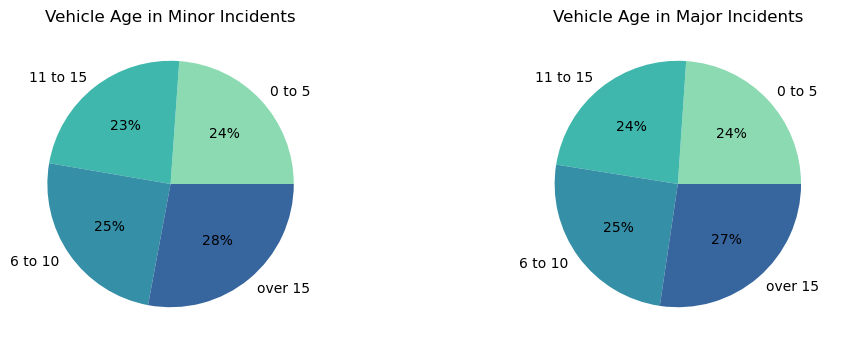

In [37]:
minor_vehicle_age = minor.groupby('vehicle_age').size()
major_vehicle_age = major.groupby('vehicle_age').size()

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].pie(minor_vehicle_age, labels=minor_vehicle_age.index, autopct='%1.0f%%')
ax[0].set_title('Vehicle Age in Minor Incidents')

ax[1].pie(major_vehicle_age, labels=major_vehicle_age.index, autopct='%1.0f%%')
ax[1].set_title('Vehicle Age in Major Incidents')

plt.show()

There is no apparent discrepancy in the age of the vehicles involved in either minor or major incidents.

#### Vehicle Body Shape

In [38]:
df['auto_model'].nunique()

39

There are too many individual models (39) and so we will convert these into 4 body shapes, namely SUV, pick-up, sedan and wagon.

In [39]:
def auto_shape_indicator(df):
    
    '''
    Assigns an 'auto_shape' value to each row in the DataFrame based on the 'auto_model' value.
    
    Parameters:
    -----------
    df: DataFrame
        A pandas DataFrame containing a column named 'auto_model'.
    
    Returns:
    --------
    Series: A pandas Series containing the assigned 'auto_shape' value.
    '''
    
    if df['auto_model'] in ['ram','f150','silverado']:
        return 'pickup'
    elif df['auto_model'] in ['92x','95','93']:
        return 'wagon'
    elif df['auto_model'] in ['tahoe','pathfinder','highlander','mdx','forrestor','escape','wrangler',
                              'x5','crv','x6','malibu','fusion','ml350','grand cherokee']:
        return 'suv'
    else:
        return 'sedan'

minor['auto_shape'] = minor.apply(auto_shape_indicator, axis=1)
major['auto_shape'] = major.apply(auto_shape_indicator, axis=1)

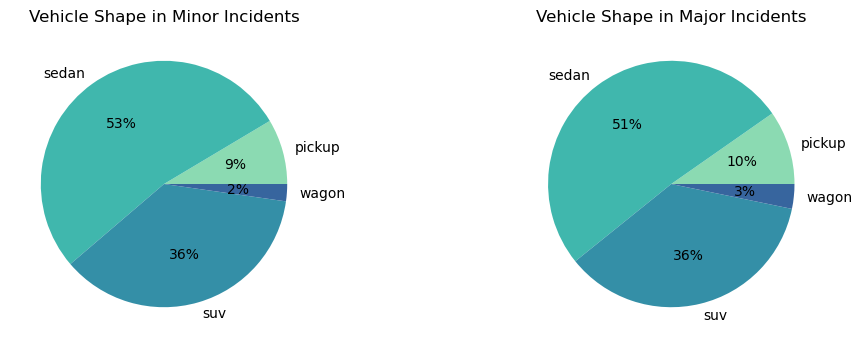

In [40]:
minor_auto_shape = minor.groupby('auto_shape').size()
major_auto_shape = major.groupby('auto_shape').size()

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].pie(minor_auto_shape, labels=minor_auto_shape.index, autopct='%1.0f%%')
ax[0].set_title('Vehicle Shape in Minor Incidents')

ax[1].pie(major_auto_shape, labels=major_auto_shape.index, autopct='%1.0f%%')
ax[1].set_title('Vehicle Shape in Major Incidents')

plt.show()

There is also no apparent difference in the proportion of vehicle body shapes involved in minor and major incidents.

### Claim Details

In [41]:
# Summary staistics of overall claim amounts
all_claims = df[['total_claim_amount','injury_claim','property_claim','vehicle_claim']]
all_claims.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
total_claim_amount,1000.0,52761.94,26401.53,100.0,41812.5,58055.0,70592.5,114920.0
injury_claim,1000.0,7433.42,4880.95,0.0,4295.0,6775.0,11305.0,21450.0
property_claim,1000.0,7399.57,4824.73,0.0,4445.0,6750.0,10885.0,23670.0
vehicle_claim,1000.0,37928.95,18886.25,70.0,30292.5,42100.0,50822.5,79560.0


In [42]:
# Summary statistics of minor claims
minor[all_claims.columns].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
total_claim_amount,444.0,39857.34,31064.43,100.0,5940.0,46820.0,65092.5,108030.0
injury_claim,444.0,5747.25,5190.00,0.0,780.0,5230.0,9525.0,21450.0
property_claim,444.0,5499.12,4942.24,0.0,802.5,5130.0,8590.0,23670.0
vehicle_claim,444.0,28610.97,22241.89,70.0,4320.0,32710.0,46732.5,74790.0


In [43]:
# Summary statistics of major claims
major[all_claims.columns].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
total_claim_amount,556.0,63067.05,15646.21,18000.0,52687.5,61860.0,73340.0,114920.0
injury_claim,556.0,8779.93,4158.29,0.0,5780.0,7560.0,12040.0,21330.0
property_claim,556.0,8917.19,4148.15,0.0,5907.5,7650.0,11685.0,21810.0
vehicle_claim,556.0,45369.93,11056.45,12720.0,37480.0,45360.0,52080.0,79560.0


- The mean total claim amount for major incidents is approximately 1.6 times greater than that of minor claims. A similar proportion exists for each of the claim subtypes: injury, property and vehicle.
- There is far greater variation in minor claim amounts, with a standard deviation of 31064 as opposed to 15646 for major claims.
- There is a significant discrepancy in the minimum claim for minor incidents compared to major incidents.

In [44]:
# Correlation
pd.DataFrame(all_claims.corr())

,total_claim_amount,injury_claim,property_claim,vehicle_claim
total_claim_amount,1.000000,0.805025,0.810686,0.982773
injury_claim,0.805025,1.000000,0.563866,0.722878
property_claim,0.810686,0.563866,1.000000,0.732090
vehicle_claim,0.982773,0.722878,0.732090,1.000000


- All claim subtypes have a high positive correlation with the total amount claimed.
- Vehicle claim and total claim amount have the highest correlation.
- Vehicle claim, property claim and injury claim have moderate positive correlations with each other.

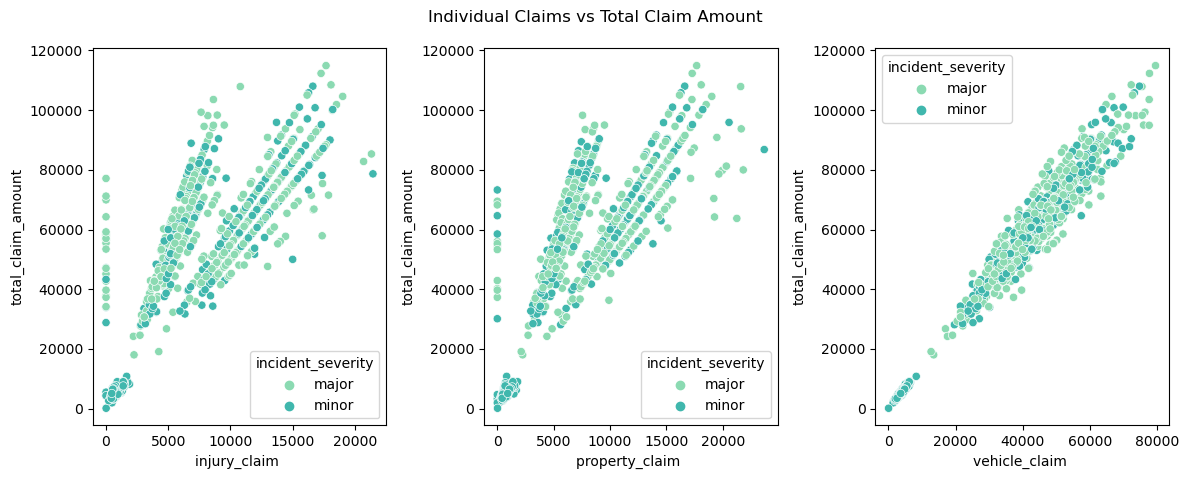

In [45]:
claim_types = df[['injury_claim','property_claim','vehicle_claim']]

fig, ax = plt.subplots(1,3,figsize=(12,5))

for i, claim in enumerate(claim_types.columns):
    sns.scatterplot(data=df, x=claim, y='total_claim_amount', hue='incident_severity', ax=ax[i])
    ax[i].set_xlabel(f'{claim} \n')
    
    if i == 0:
        ax[i].set_ylabel('total_claim_amount')

fig.suptitle('Individual Claims vs Total Claim Amount')
plt.tight_layout()
plt.show()

Text(0.5, 0, '\n Type of Claim')

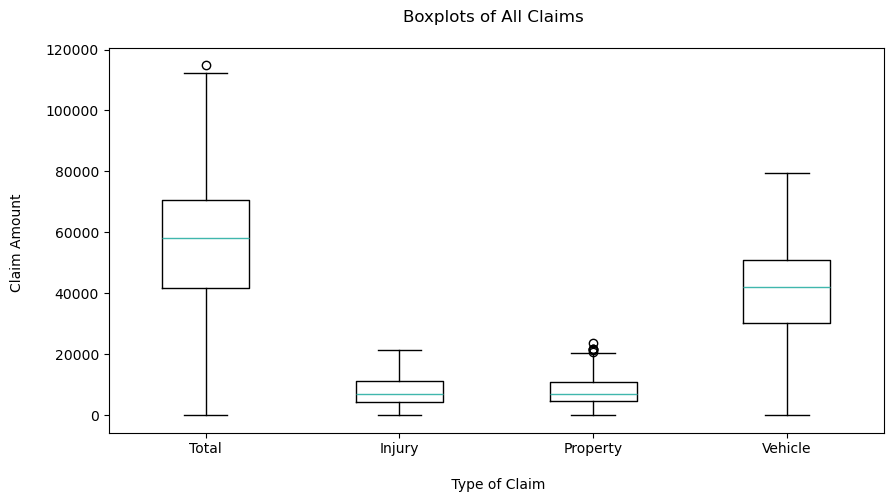

In [46]:
# Boxplots
plt.figure(figsize=(10,5))
plt.boxplot(all_claims)
plt.title('Boxplots of All Claims \n')
plt.xticks(range(1,5),['Total','Injury','Property','Vehicle'])
plt.ylabel('Claim Amount \n')
plt.xlabel('\n Type of Claim')